### House Price Prediction Using Machine Learning
Supervised learning , Model: Linear Regression
steps we'll need to follow:


1.   Import Libraries
2.   Load Dataset
1.   Data Preprocessing
2.   Split Dataset
1.   Train the Model
2.   Evaluate the Model






In [32]:
import pandas as pd #used for data analysis
import numpy as np  #used for performing mathematical operations on arrays

import matplotlib.pyplot as plt  #is used to plot visualization graphs
import seaborn as sns  #used for data visualization and data anlysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [33]:
file_path = '/content/house_price_dataset_original_v2_with_categorical_features.csv'
df = pd.read_csv(file_path)
df_Tour = df.copy()
print(f'there are {df_Tour.shape[0]} rows , and {df_Tour.shape[1]} columns')

there are 4954 rows , and 16 columns


In [34]:
df_Tour.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
0,201 sqm,177 sqm,3,1,No,Yes,Yes,No,3.3km,Yes,10 Years,No,6.8 km,0.90,small,165432
1,196 sqm,182 sqm,4,3,Yes,Yes,No,Yes,1.2km,Yes,11 Years,No,4.1 km,1.42,medium,187043
2,198 sqm,182 sqm,4,4,Yes,Yes,No,Yes,5.9km,No,20 Years,No,2.1 km,4.12,medium,148658
3,178 sqm,166 sqm,2,3,No,Yes,No,No,5.9km,No,5 Years,No,0.7 km,4.36,small,123785
4,183 sqm,165 sqm,3,1,Yes,Yes,No,No,3.8km,Yes,8 Years,No,0.7 km,0.42,small,156470


In [35]:
df_Tour.tail()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
4949,297 sqm,261 sqm,4,4,Yes,Yes,Yes,Yes,2.9km,Yes,20 Years,No,4.1 km,3.99,large,235882
4950,302 sqm,282 sqm,4,2,Yes,Yes,Yes,Yes,3.8km,Yes,12 Years,Yes,4.8 km,2.09,large,290995
4951,153 sqm,147 sqm,3,4,Yes,Yes,No,No,3.3km,Yes,7 Years,No,4.7 km,3.98,extra_large,106428
4952,180 sqm,158 sqm,2,1,No,Yes,No,Yes,2.2km,No,1 Years,No,3.4 km,3.75,large,107579
4953,695 sqm,619 sqm,8,6,Yes,Yes,Yes,Yes,0.4km,Yes,5 Years,No,0.4 km,4.64,large,537980


In [36]:
print('number of rows: ', df_Tour.shape[0])
print('number of columns: ', df_Tour.shape[1])
print('features are: ' , df_Tour.columns.tolist())
print('\n')

number of rows:  4954
number of columns:  16
features are:  ['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms', 'large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'distance_to_school', 'wall_fence', 'house_age', 'water_front', 'distance_to_supermarket', 'crime_rate_index', 'room_size', 'property_value']




In [37]:
print('Duplicated values are: \n', df_Tour.duplicated().sum())

Duplicated values are: 
 0


In [38]:
print('Missing values are: \n', df_Tour.isnull().sum().sort_values(ascending=False))

Missing values are: 
 land_size_sqm              0
house_size_sqm             0
no_of_rooms                0
no_of_bathrooms            0
large_living_room          0
parking_space              0
front_garden               0
swimming_pool              0
distance_to_school         0
wall_fence                 0
house_age                  0
water_front                0
distance_to_supermarket    0
crime_rate_index           0
room_size                  0
property_value             0
dtype: int64


In [39]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   land_size_sqm            4954 non-null   object 
 1   house_size_sqm           4954 non-null   object 
 2   no_of_rooms              4954 non-null   int64  
 3   no_of_bathrooms          4954 non-null   int64  
 4   large_living_room        4954 non-null   object 
 5   parking_space            4954 non-null   object 
 6   front_garden             4954 non-null   object 
 7   swimming_pool            4954 non-null   object 
 8   distance_to_school       4954 non-null   object 
 9   wall_fence               4954 non-null   object 
 10  house_age                4954 non-null   object 
 11  water_front              4954 non-null   object 
 12  distance_to_supermarket  4954 non-null   object 
 13  crime_rate_index         4954 non-null   float64
 14  room_size               

In [40]:
# Convert to numerical values
df_Tour['land_size_sqm'] = df_Tour['land_size_sqm'].str.extract('(\d+)').astype(int)
df_Tour['house_size_sqm'] = df_Tour['house_size_sqm'].str.extract('(\d+)').astype(int)
df_Tour['distance_to_school'] = df_Tour['distance_to_school'].str.extract('(\d+)').astype(int)
df_Tour['house_age'] = df_Tour['house_age'].str.extract('(\d+)').astype(int)
df_Tour['distance_to_supermarket'] = df_Tour['distance_to_supermarket'].str.extract('(\d+)').astype(int)


In [41]:
# One Hot encoding
df_Tour = pd.get_dummies(df_Tour,columns=['large_living_room','parking_space','front_garden','swimming_pool','wall_fence','water_front','room_size']).astype(int)
df_Tour.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket,crime_rate_index,property_value,large_living_room_No,...,swimming_pool_No,swimming_pool_Yes,wall_fence_No,wall_fence_Yes,water_front_No,water_front_Yes,room_size_extra_large,room_size_large,room_size_medium,room_size_small
0,201,177,3,1,3,10,6,0,165432,1,...,1,0,0,1,1,0,0,0,0,1
1,196,182,4,3,1,11,4,1,187043,0,...,0,1,0,1,1,0,0,0,1,0
2,198,182,4,4,5,20,2,4,148658,0,...,0,1,1,0,1,0,0,0,1,0
3,178,166,2,3,5,5,0,4,123785,1,...,1,0,1,0,1,0,0,0,0,1
4,183,165,3,1,3,8,0,0,156470,0,...,1,0,0,1,1,0,0,0,0,1


In [42]:
# Normalize
mean = df_Tour.mean()[0]
stddev = df_Tour.std()[0]
df_Tour = (df_Tour - df_Tour.mean())/df_Tour.std()

df_Tour.head()

<ipython-input-42-dc1447eb3267>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = df_Tour.mean()[0]
<ipython-input-42-dc1447eb3267>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stddev = df_Tour.std()[0]


,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket,crime_rate_index,property_value,large_living_room_No,...,swimming_pool_No,swimming_pool_Yes,wall_fence_No,wall_fence_Yes,water_front_No,water_front_Yes,room_size_extra_large,room_size_large,room_size_medium,room_size_small
0,-0.476394,-0.573649,-0.497203,-1.372926,0.022503,-0.227260,1.513494,-1.450653,-0.405887,1.618893,...,1.270945,-1.270945,-0.765622,0.765622,0.226108,-0.226108,-0.564705,-0.748466,-0.646355,2.929244
1,-0.524875,-0.520779,0.133564,-0.124720,-0.981814,-0.069953,0.501775,-0.867519,-0.165849,-0.617581,...,-0.786657,0.786657,-0.765622,0.765622,0.226108,-0.226108,-0.564705,-0.748466,1.546825,-0.341316
2,-0.505483,-0.520779,0.133564,0.499383,1.026820,1.345811,-0.509944,0.881880,-0.592198,-0.617581,...,-0.786657,0.786657,1.305864,-1.305864,0.226108,-0.226108,-0.564705,-0.748466,1.546825,-0.341316
3,-0.699409,-0.689963,-1.127971,-0.124720,1.026820,-1.013796,-1.521663,0.881880,-0.868467,1.618893,...,1.270945,-1.270945,1.305864,-1.305864,0.226108,-0.226108,-0.564705,-0.748466,-0.646355,2.929244
4,-0.650927,-0.700537,-0.497203,-1.372926,0.022503,-0.541874,-1.521663,-1.450653,-0.505429,-0.617581,...,1.270945,-1.270945,-0.765622,0.765622,0.226108,-0.226108,-0.564705,-0.748466,-0.646355,2.929244


In [43]:
# Split dataset
X = df_Tour.drop('property_value', axis=1)
y = df_Tour['property_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the splits
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", y_train)
print("Y_test:\n", y_test)

X_train:
       land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
3408       0.153867        0.124235     0.764331         1.123486   
2211       1.782848        1.921814     1.395098         0.499383   
1204      -0.495786       -0.510205     0.133564         1.123486   
80        -0.854550       -0.912017    -0.497203         0.499383   
803       -0.553964       -0.605371    -0.497203         0.499383   
...             ...             ...          ...              ...   
4426       0.115082       -0.076671     0.133564         0.499383   
466        0.948965        0.843266     0.764331         1.123486   
3092      -1.029084       -0.986035    -1.758738        -0.748823   
3772       0.764735        1.023024     1.395098         1.123486   
860       -0.457001       -0.489057     0.133564         1.123486   

      distance_to_school  house_age  distance_to_supermarket  \
3408            1.026820  -1.013796                 1.513494   
2211            0.524661  -1.0137

In [45]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print("Actual values:", y_test)
print('\n')
print("Predicted values:", y_pred)
print('\n')

Mean Squared Error: 0.00981313813265664
R-squared: 0.9900693150635175
Actual values: 3130   -1.435067
4722    0.554195
3290   -1.517793
2473   -0.774234
168    -1.286952
          ...   
422     0.133078
95     -0.108870
4151    0.686204
1807    1.193480
2107   -1.465889
Name: property_value, Length: 991, dtype: float64


Predicted values: [-1.45708442e+00  6.63973801e-01 -1.45082967e+00 -7.65333476e-01
 -1.49733562e+00  2.84161544e-01 -1.54681415e+00  4.42502293e-01
  1.82799969e-02 -8.30333685e-01  1.10871707e+00  4.45833067e-01
 -9.03952353e-02  1.54805581e+00  1.56094138e+00 -2.15308354e-01
 -2.30538898e-01 -1.38009202e-02  1.18747236e+00 -1.61573433e+00
  5.37793906e-01 -1.28432780e+00  1.26857410e+00 -5.09426562e-01
 -7.03323173e-01 -5.64042328e-02  3.34301541e+00  3.14960194e-01
 -1.79770231e-01  4.52426492e-01  1.28983626e+00 -6.06257496e-01
  9.78506564e-01  9.74700903e-01  7.55275487e-01  7.45678374e-01
 -1.06879268e+00 -1.24980891e+00  1.04704658e+00 -5.64276078e-01
  6.8901

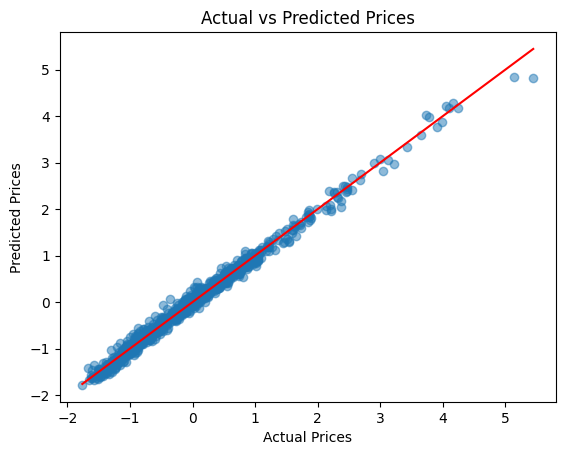

In [47]:
# Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


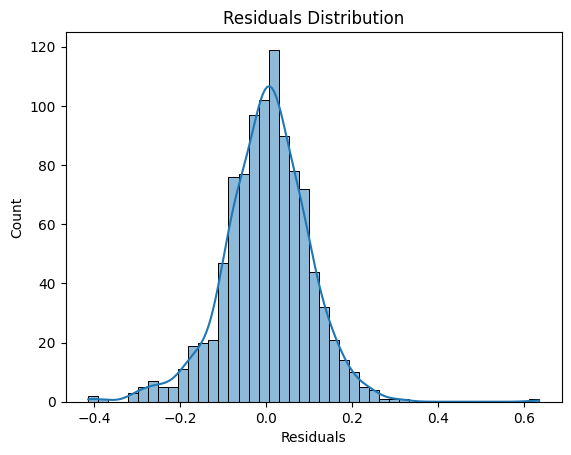

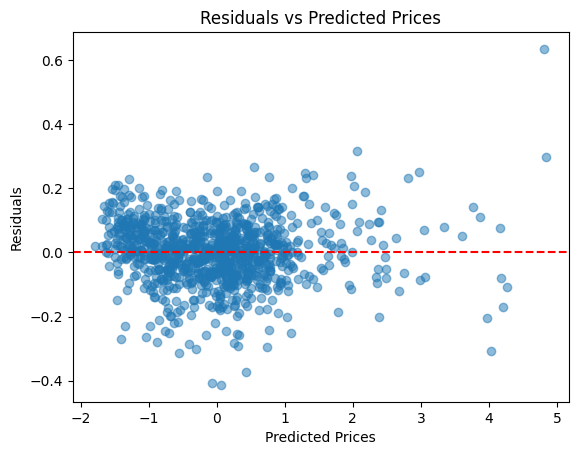

In [48]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Residuals Scatter Plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
